In [159]:
# import ira
import pandas as pd
import numpy as np
import requests
from tqdm.auto import tqdm

# %alphalab dark

In [160]:
def get_funding_rates_okex(symbol):
    r_okex = requests.get(f'https://www.okex.com/api/swap/v3/instruments/{symbol}/historical_funding_rate?limit=1000')
    print(r_okex.json())
    okx = pd.DataFrame.from_dict(r_okex.json())
    okx.funding_time = pd.DatetimeIndex(okx.funding_time)
    okx = okx.set_index('funding_time')
    okx = okx.astype({'funding_rate': float, 'realized_rate':float, 'interest_rate': float})
    okx = okx.sort_index()
    return okx

In [161]:
def get_funding_rates_binance(symbol):
    r_bnc = requests.get(f'https://fapi.binance.com/fapi/v1/fundingRate?symbol={symbol}&limit=1000')
    bnc = pd.DataFrame.from_dict(r_bnc.json())
    bnc.fundingTime = pd.to_datetime(bnc.fundingTime.values, unit='ms', utc=True)
    bnc = bnc.set_index('fundingTime')
    bnc = bnc.astype({'fundingRate': float})
    bnc = bnc.sort_index().tz_localize(None)
    # drop msecs
    bnc.index = bnc.index.floor('1s')
    return bnc

In [162]:
def get_current_funding_rates_binance(symbol):
    r_bnc = requests.get(f'https://fapi.binance.com/fapi/v1/premiumIndex?symbol={symbol}')
    bnc = mstruct(**r_bnc.json())
    bnc.nextFundingTime = pd.to_datetime(bnc.nextFundingTime, unit='ms')
    bnc.time = pd.to_datetime(bnc.time, unit='ms')
    bnc.lastFundingRate = float(bnc.lastFundingRate)
    bnc.interestRate = float(bnc.interestRate)
    return bnc

In [163]:
fr0 = get_funding_rates_binance('BTCUSDT')

In [164]:
fr0

,symbol,fundingRate
fundingTime,,
2021-07-19 08:00:00,BTCUSDT,0.000032
2021-07-19 16:00:00,BTCUSDT,-0.000012
2021-07-20 00:00:00,BTCUSDT,-0.000157
2021-07-20 08:00:00,BTCUSDT,-0.000126
2021-07-20 16:00:00,BTCUSDT,-0.000189
...,...,...
2022-06-16 00:00:00,BTCUSDT,-0.000041
2022-06-16 08:00:00,BTCUSDT,0.000045
2022-06-16 16:00:00,BTCUSDT,-0.000053


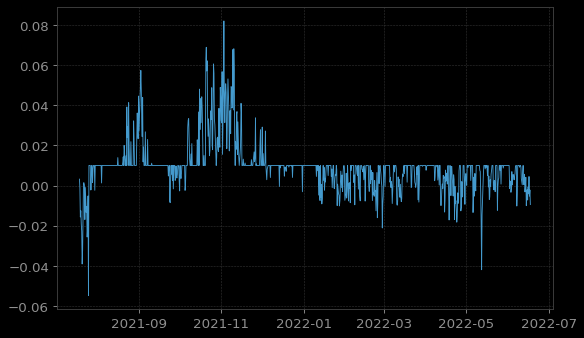

In [165]:
plt.plot(100*get_funding_rates_binance('BTCUSDT').fundingRate)

In [166]:
symbols = [
    '1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ADAUSDT', 'AKROUSDT',
    'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'APEUSDT',
    'API3USDT', 'ARUSDT', 'ARPAUSDT', 'ATAUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT',
    'AXSUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT',
    'BLZUSDT', 'BNBUSDT', 'BNXUSDT', 'BTCUSDT', 'BTSUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT',
    'CHRUSDT', 'CHZUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVCUSDT',
    'DARUSDT', 'DASHUSDT', 'DEFIUSDT', 'DENTUSDT', 'DGBUSDT', 'DODOUSDT', 'DOGEUSDT', 'DOTUSDT',
    'DUSKUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT',
    'FILUSDT', 'FLMUSDT', 'FLOWUSDT', 'FTMUSDT', 'FTTUSDT', 'GALUSDT', 'GALAUSDT',
    'GMTUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT',
    'IMXUSDT', 'IOSTUSDT', 'IOTAUSDT', 'IOTXUSDT', 'JASMYUSDT', 'KAVAUSDT', 'KLAYUSDT', 'KNCUSDT',
    'KSMUSDT', 'LINAUSDT', 'LINKUSDT', 'LITUSDT', 'LPTUSDT', 'LRCUSDT', 'LTCUSDT', 'MANAUSDT', 'MASKUSDT',
    'MATICUSDT', 'MKRUSDT', 'MTLUSDT', 'NEARUSDT', 'NEOUSDT', 'NKNUSDT', 'OCEANUSDT', 'OGNUSDT', 'OMGUSDT',
    'ONEUSDT', 'ONTUSDT', 'PEOPLEUSDT', 'QTUMUSDT', 'RAYUSDT', 'REEFUSDT', 'RENUSDT', 'RLCUSDT', 'ROSEUSDT',
    'RSRUSDT', 'RUNEUSDT', 'RVNUSDT', 'SANDUSDT', 'SCUSDT', 'SFPUSDT', 'SKLUSDT', 'SNXUSDT', 'SOLUSDT',
    'SRMUSDT', 'STMXUSDT', 'STORJUSDT', 'SUSHIUSDT', 'SXPUSDT', 'THETAUSDT', 'TLMUSDT', 'TOMOUSDT', 'TRBUSDT',
    'TRXUSDT', 'UNFIUSDT', 'UNIUSDT', 'VETUSDT', 'WAVESUSDT', 'WOOUSDT', 'XEMUSDT', 'XLMUSDT',
    'XMRUSDT', 'XRPUSDT', 'XTZUSDT', 'YFIUSDT', 'ZECUSDT', 'ZENUSDT', 'ZILUSDT', 'ZRXUSDT'
]

In [167]:
def collect_historical_funding_rates(symbols):
    res = None
    for s in tqdm(symbols):
        fr = get_funding_rates_binance(s)
        res = pd.concat((res, fr.fundingRate.rename(s)), axis=1)
    return res

Collect historical rates

In [89]:
rates = collect_historical_funding_rates(symbols)

In [168]:
def trading_funding_rates(rates, threshold, capital_per_symbol):
    pfl = {}
    for s in tqdm(rates.columns.values):
        fr = rates[s]
        # funding rates should be at least > than transaction costs
        trades = fr[fr > threshold]
        pfl[f'{s}_PnL'] = capital_per_symbol * (trades - threshold)
        pfl[f'{s}_Pos'] = pd.Series(capital_per_symbol, trades.index)
    pfl = pd.DataFrame(pfl).fillna(0)
    return pfl

Based on these fees rates from Binance (https://www.binance.com/en/fee/schedule) we could estimate profitablity of this model on all perpetual futures.

In [169]:
transactions_market_orders_VIP0 = (
    2*0.036 +     # 2 transactions on futures market (open and close) 0.036% as market taker
    2*0.075       # 2 transactions on spot market (open and close) 0.075% as market taker
) / 100

transactions_limit_orders_VIP0 = (
    2*0.018 +     # 2 transactions on futures market (open and close) 0.036% as market maker
    2*0.075       # 2 transactions on spot market (open and close) 0.075% as market maker
) / 100


# run this for market orders entries/exits
pfl_market_orders = trading_funding_rates(rates, transactions_market_orders_VIP0, 20_000)

# run for limit orders entries/exits 
pfl_limit_orders = trading_funding_rates(rates, transactions_limit_orders_VIP0, 20_000)

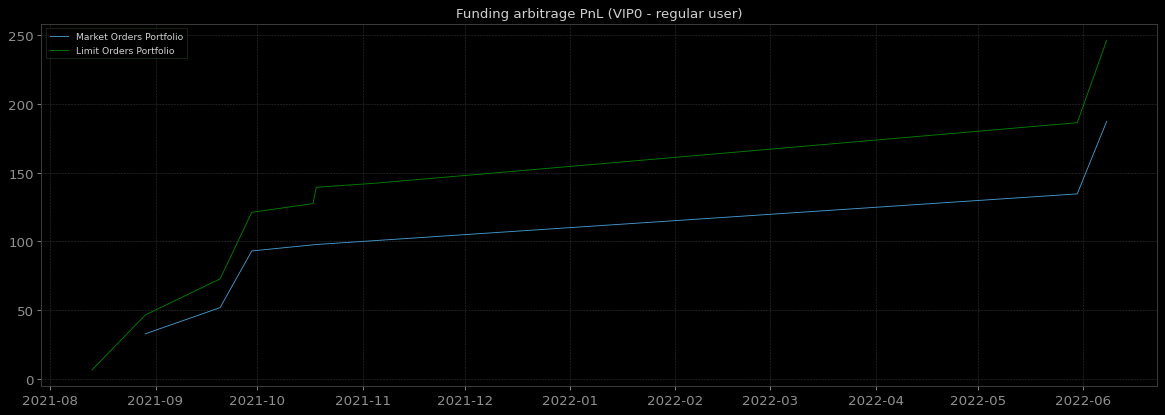

In [170]:
plt.figure(figsize=(18, 6))
plt.plot(pfl_market_orders.filter(regex='.*_PnL').sum(axis=1).cumsum(), label='Market Orders Portfolio');
plt.plot(pfl_limit_orders.filter(regex='.*_PnL').sum(axis=1).cumsum(), label='Limit Orders Portfolio'); 
plt.title('Funding arbitrage PnL (VIP0 - regular user)')
plt.legend();

It doesn't look like super profitable strategy for retail trader. What fees leves you should have to make this more attractive ? What's about VIP9

In [171]:
transactions_market_orders_VIP9 = (
    2*0.03 +     # 2 transactions on futures market (open and close) as market taker
    2*0.0153     # 2 transactions on spot market (open and close)  as market taker
) / 100

transactions_limit_orders_VIP9 = (
    2*0.015 +     # 2 transactions on futures market (open and close) as market maker
    2*0.0         # 2 transactions on spot market (open and close) as market maker
) / 100


In [172]:
# run this for market orders entries/exits
pfl_market_orders_VIP9 = trading_funding_rates(rates, transactions_market_orders_VIP9, 20_000)

# run for limit orders entries/exits 
pfl_limit_orders_VIP9 = trading_funding_rates(rates, transactions_limit_orders_VIP9, 20_000)

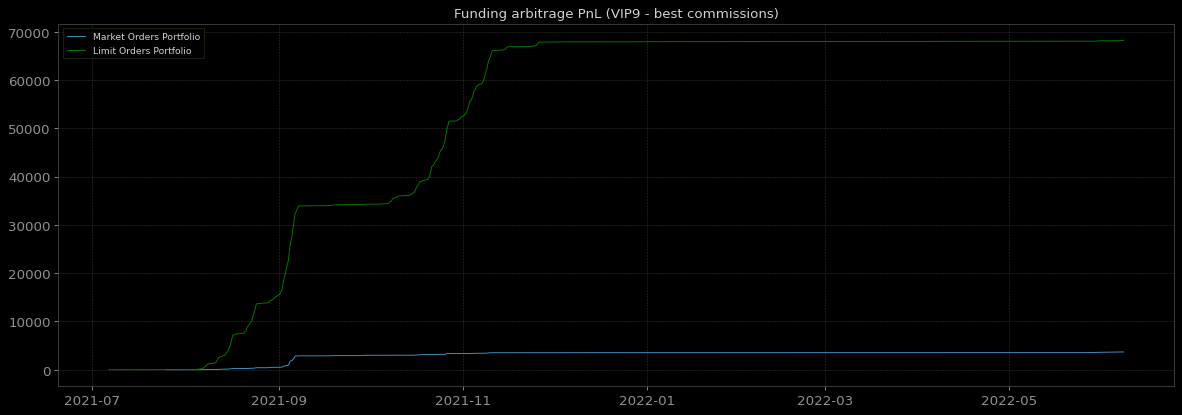

In [173]:
plt.figure(figsize=(18, 6))
plt.plot(pfl_market_orders_VIP9.filter(regex='.*_PnL').sum(axis=1).cumsum(), label='Market Orders Portfolio');
plt.plot(pfl_limit_orders_VIP9.filter(regex='.*_PnL').sum(axis=1).cumsum(), label='Limit Orders Portfolio'); 
plt.title('Funding arbitrage PnL (VIP9 - best commissions)')
plt.legend();